In [16]:
import numpy as np                  
import pandas as pd
import seaborn as sns   
import seaborn as sns               # for plots
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import warnings
from tqdm import tqdm

/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
df=pd.read_csv('Constantin BOGDANAS - household_power_consumption.txt',sep=';')

/var/folders/60/bfzc0kqx1l54g6mx713k6cx80000gn/T/ipykernel_7994/2736695019.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Constantin BOGDANAS - household_power_consumption.txt',sep=';')


In [4]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [7]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],infer_datetime_format=True,dayfirst=True)
df = df.set_index('Datetime')
df = df.drop(['Date','Time'], axis=1)

In [8]:
for col in df.columns:
    try:
        df[col]=df[col].astype(float)
    except Exception as e:
        print('Erreur sur {}: {}'.format(col,str(e)))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


<AxesSubplot:xlabel='Datetime'>

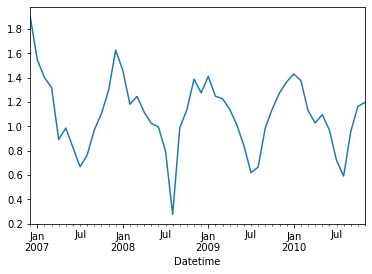

In [13]:
df['Global_active_power'].resample('M').mean().plot()

In [14]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [149]:
x = df['Global_active_power'].resample('M').mean()


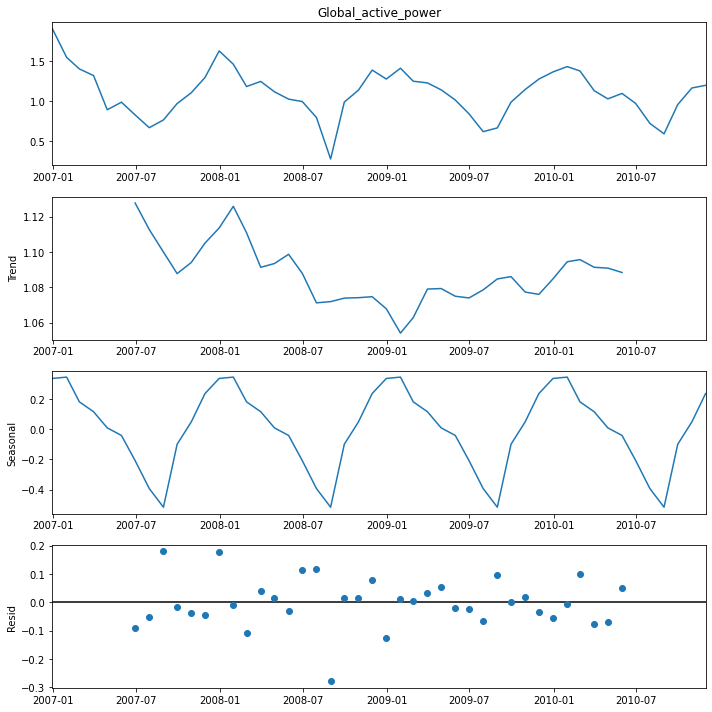

In [150]:
decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()
plt.rcParams["figure.figsize"]=(10, 10)

plt.show()

In [156]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(x)
# On a un p-value < 0.05, donc on a unse serie stationnaire, pas besoin de la differencier. 
# 
print(adf, pvalue, usedlag_, nobs_, critical_values_, icbest_)
pvalue

-4.897270331927381 3.5303542477698e-05 9 38 {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418} -34.665683436070594


3.5303542477698e-05

In [138]:
acf(x)

array([ 1.        ,  0.64699225,  0.29680957, -0.02960347, -0.31601166,
       -0.50429647, -0.57499433, -0.56582161, -0.38942082, -0.06233935,
        0.25236882,  0.49695209,  0.63108181,  0.49073642,  0.23068487,
        0.02297165, -0.16404719, -0.35582902, -0.42211562, -0.42822964,
       -0.32447455, -0.05365352,  0.16265951,  0.34821831,  0.4053669 ,
        0.33226209,  0.16220383,  0.01871577, -0.10406729, -0.21430371,
       -0.28374508, -0.30656017, -0.20860908, -0.03883305,  0.08530012,
        0.17459288,  0.20749875,  0.18080237,  0.10666746,  0.01848285,
       -0.02832626])

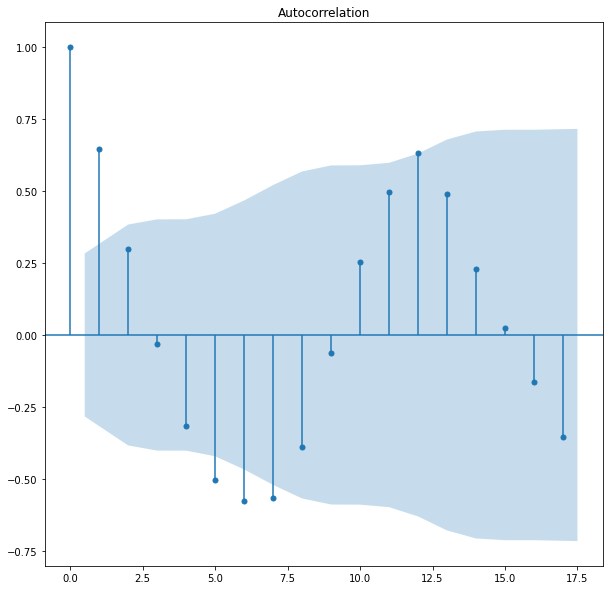

In [33]:
a=plot_acf(x)

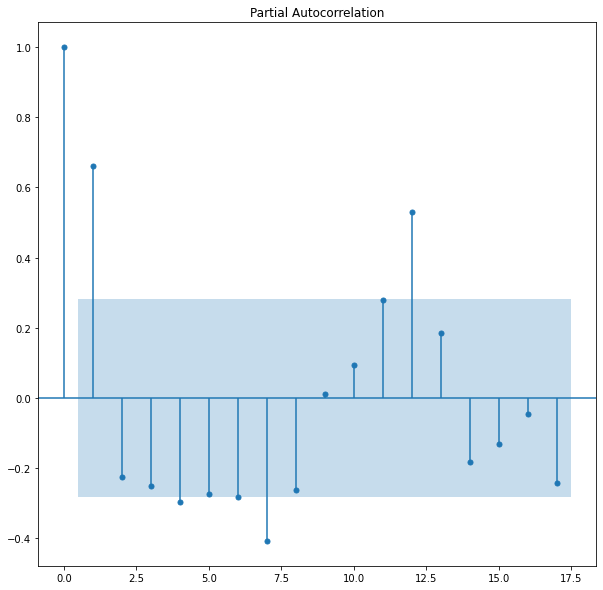

In [154]:
_ =plot_pacf(x.dropna())

In [173]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(x.dropna()[:-5],
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12))

results = mod.fit()


print(results.summary().tables[2])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15673D-01    |proj g|=  8.63963D+00


 This problem is unconstrained.



At iterate    5    f= -1.84456D-01    |proj g|=  1.47174D+00

At iterate   10    f= -2.11796D-01    |proj g|=  1.51208D-01

At iterate   15    f= -2.32394D-01    |proj g|=  2.65830D-01

At iterate   20    f= -2.35098D-01    |proj g|=  8.91975D-02

At iterate   25    f= -2.35335D-01    |proj g|=  3.31675D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     28     37      1     0     0   1.841D-03  -2.353D-01
  F = -0.23533914596572067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                21.73
Prob(Q):                     

<AxesSubplot:ylabel='Density'>

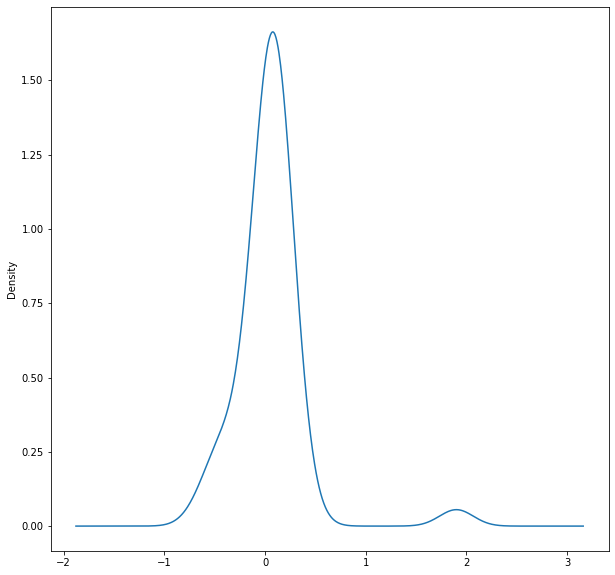

In [171]:
results.resid.plot(kind="kde")

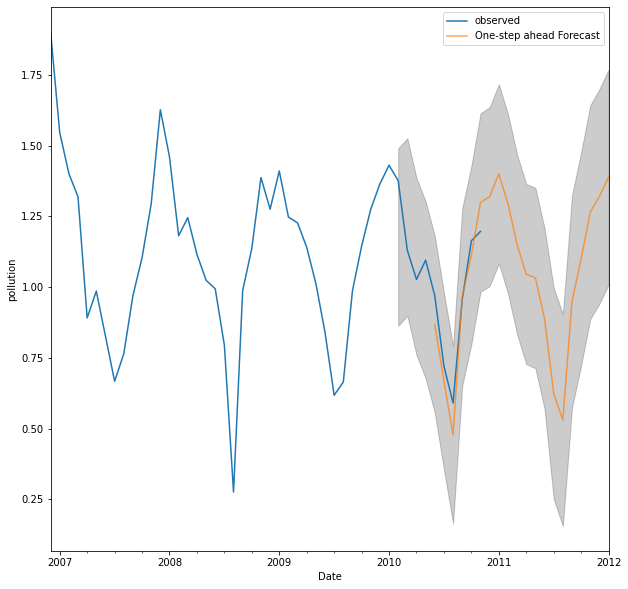

In [172]:
pred = results.get_prediction(start="2010-02",end="2012-1", dynamic=False)

pred_ci = pred.conf_int()



ax = x[-50:].plot(label='observed')
pred.predicted_mean[-20:].plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

In [142]:
from sklearn.metrics import mean_squared_error

# Je calcule l'erreur sur les pas de temps inconnus du modele (evaluation de la qualité de prediction)
# on obtient un RMSE de 0.32373079271470806 (pour le modele SARIMA) ce qui est assez bien, ce qui nous 
# indique qu'il est capable de s'adapter à l'ensemble de données le mieux parmi les trois modèles potentiels.

rms = mean_squared_error(x[-10:], pred.predicted_mean[-10:], squared=False)
rms

0.32373079271470806

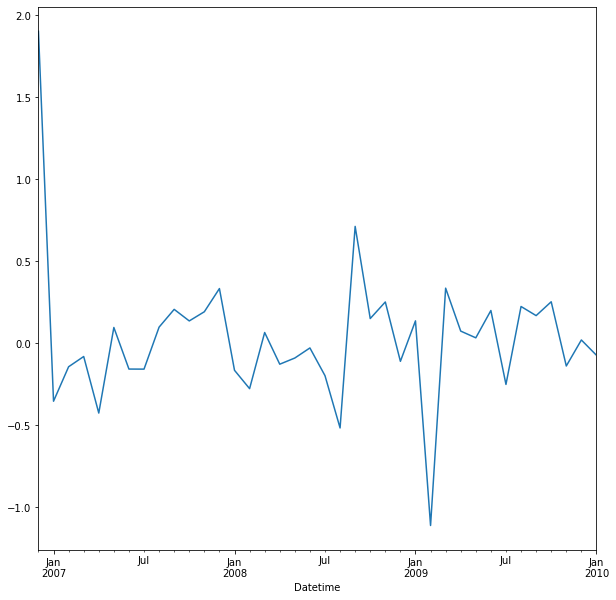

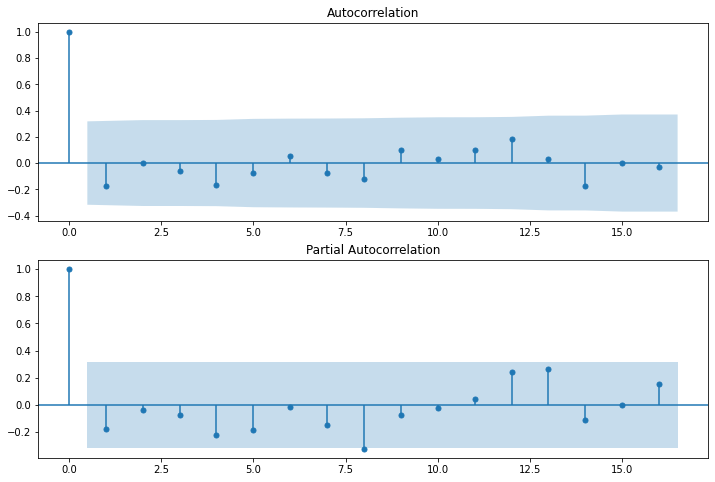

In [101]:
results.resid.plot()

plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid,  ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, ax=ax2)
plt.show()

In [ ]:
# Il n'y a pas de pics significatifs,sauf au lag 1. Ces paramètres constituent un point de départ acceptable pour le modèle .

In [162]:
# Une métrique qui peut être utilisée pour comparer la qualité relative de chaque modèle est l'AIC (Akaike information criterion),
# qui est un estimateur de l'erreur de prédiction hors échantillon ; un score AIC plus faible indique un modèle plus prédictif.
# Voir le code ci-dessous qui a généré la liste des différentes combinaisons de paramètres, ainsi que le pipeline du modèle SARIMA
# qui a testé chaque combinaison et imprimé les scores AIC correspondants : les meilleurs parametres sont les paramètres SARIMA(2, 1, 2),(2, 1, 2, 12) - AIC:-11.064372552245487 

import itertools
p = range(0,3)
q = range(1,3)
d = range(1,2)
s = range(12,13)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(x,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: -0.298832
         Iterations: 4
         Function evaluations: 179
SARIMA(0, 1, 1),(0, 1, 1, 12) - AIC:-22.68787590364569
Optimization terminated successfully.
         Current function value: -0.298908
         Iterations: 4
         Function evaluations: 221
SARIMA(0, 1, 1),(0, 1, 2, 12) - AIC:-20.69520805283884
Optimization terminated successfully.
         Current function value: -0.298908
         Iterations: 8
         Function evaluations: 502
SARIMA(0, 1, 1),(1, 1, 1, 12) - AIC:-20.69519428104698
Optimization terminated successfully.
         Current function value: -0.298906
         Iterations: 3
         Function evaluations: 212
SARIMA(0, 1, 1),(1, 1, 2, 12) - AIC:-18.69493627385897
Optimization terminated successfully.
         Current function value: -0.298909
         Iterations: 4
         Function evaluations: 268
SARIMA(0, 1, 1),(2, 1, 1, 12) - AIC:-18.69521701705563
Optimization terminated succes